<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-armed bandits


In [ ]:
import numpy as np

np.set_printoptions(precision=3)

import pandas as pd

## Multi-armed bandits

The classic multi-armed bandit is illustrated below.
The agent (the octopus) must choose which "arm" to pull.
Each slot machine (aka one-armed bandit) has a different, but unknown, payout rate (reward), denoted $R(a)$.



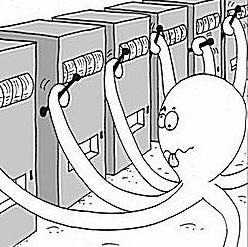

* In a MAB problem, the goal is to choose a sequence of actions (arm pulls) that maximizes the sum of expected rewards:
$$
a_{1:T} = \arg \max_{a_{1:T}} \sum_{t=}^T E_{a_t \sim \pi}[R(a_t | \theta)]
$$
where $T$ is the **finite horizon**, $\pi()$ is the (stochastic) **policy**, $R(a|\theta)$ is the reward function for action $a$ using model parameters $\theta$.
* In the **infinite horizon** case, we use a **discount factor** $\gamma < 1$ to ensure the sum converges:
$$
J = \sum_{t=1}^\infty \gamma^{t-1} E_{ a_t \sim \pi}[R(a_t | \theta)]
$$
* For binary rewards, we can use a **Bernoulli bandit**
$$
p(R|a) = \text{Ber}(R|\mu_a)
$$
where $\mu_a=E[R|a]=p(R=1|a)$.
* For real-valued rewards, we can use a **Gaussian bandit**
$$
p(R|a) = \text{Gauss}(R|\mu_a, \sigma_a^2)
$$


## Contextual bandits 

* In **contextual bandits**, the agent is in a random state $s_t$ at each step. States are drawn iid from some unknown distribution $p(s_t)$. The policy should now depend on the inputs, $a_t \sim \pi(s_t)$.
* The goal is to maximimize
$$
J = \sum_{t=1}^\infty \gamma^{t-1} E_{ s_t \sim p(s), a_t \sim \pi(a|s_t)}[R(s_t, a_t | \theta)]
$$
* There are numerous applications, e.g.
** **Online advertising**, where the action specifies which ad to show, and the state specifies user features (e.g., search history) and/or web page features (e.g., content).
** **Recommender systems**, where the action specifies which (set of) item(s)  to show, and the state specifies user features.
** **Clinical trials**, where the action specifies which drug to give, and the state specifies patient features.
* For binary rewards, we can use logistic regression model
$$
p(R|s,a;\theta) = \text{Ber}(R|\sigma(\theta^T \phi(s,a)))
$$
where $\phi(s,a)$ is a feature vector, possibly computed using a deep neural network, and $\sigma(x)=1/(1+e^{-x})$ is the sigmoid or logistic function.
* For real-valued rewards, we can replace the sigmoid output with a linear output, and use a Gaussian observation model.
* A key problem is that the rewards for each (state,action) pair (represented by model parameters $\theta$) are unknown.
* The agent can infer the parameters in an online (recursive) fashion given the data stream $D_{1:t} = (s_{1:t}, a_{1:t}, r_{1:t})$ using **sequential Bayesian updating**:
$$
\begin{align}
p(\theta|D_{1:t}) &= 
p(\theta|D_t, D_{1:t-1})
= \frac{p(D_t|\theta,D_{1:t-1}) p(\theta|D_{1:t-1})}
{p(D_t|D_{1:t-1})} 
\propto p(D_t|\theta) p(\theta|D_{1:t-1})
\end{align}
$$
* The likelihood is $p(D_t|\theta)=p(r_t|s_t, a_t,\theta)$ and the prior is the belief state from the previous time step, $p(\theta|D_{1:t-1})$.


## Exploration-exploitation tradeoff

* The agent must try each (state, action) pair (possibly multiple times) in order to collect data, but these experiments incur an opportunity cost. This is called the **exploration-exploitation tradeoff**.
* A common heuristic solution is the **upper confidence bound** method, which selects the action according to
$$
a_t = \arg \max_a E[R(s_t,a;\theta)] + c \;\text{std}[R(s_t,a;\theta)]
$$
* The  constant $c \geq 0$ reflects the amount of optimism about unknown rewards, and hence the amount of exploration.
* Below we illustrate the distribution over possible rewards for  a 3-armed bandit (without contextual features).

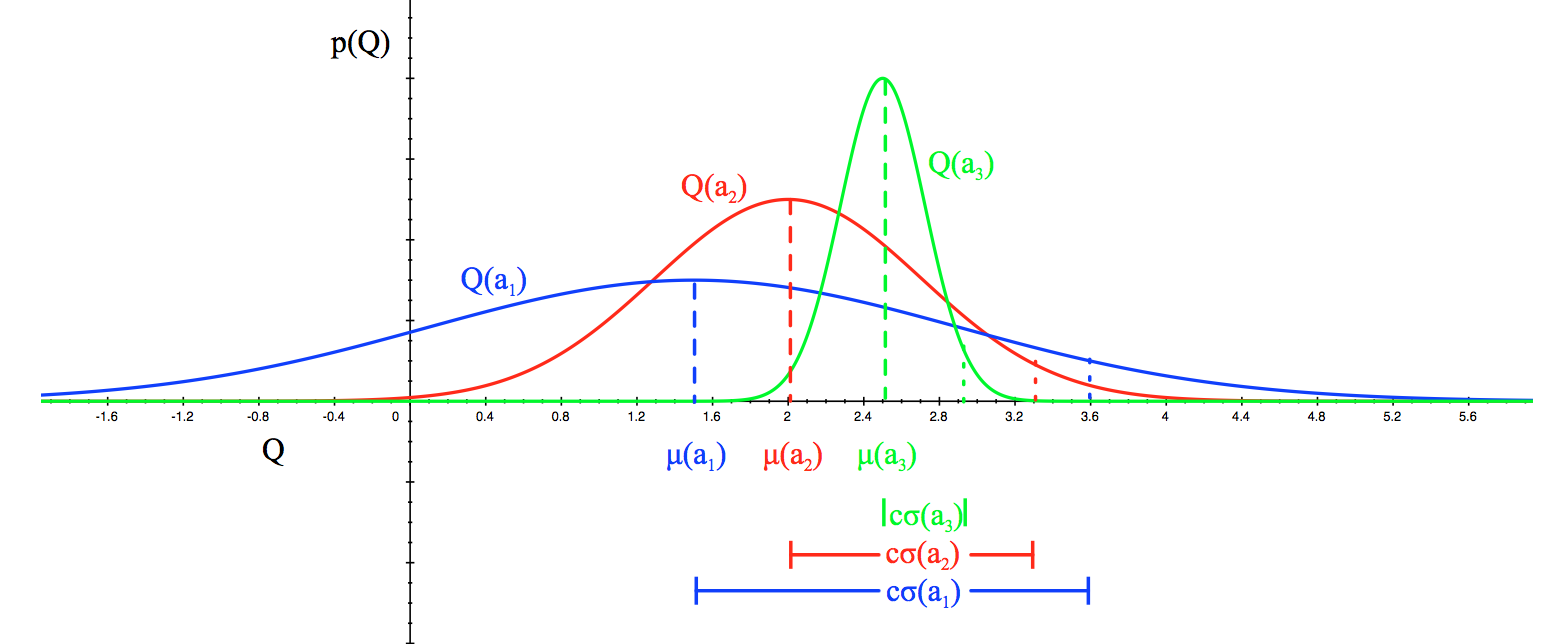

## Reinforcement learning


* In **reinforcement learning**, the setup is similar to a contextual bandit, except now the current state depends on the previously visited states, as well as the actions that the agent has taken. 
* If we assume a Markov model for the enviroment, we get a **Markov decision process** or **MDP**.
$$
J = \sum_{t=1}^\infty \gamma^{t-1} E_{ s_t \sim p(s|s_{t-1}, a_{t-1}; \theta), a_t \sim \pi(a|s_{1:t})}[R(s_t, a_t | \theta)]
$$
* Solving for the optimal policy when the parameters $\theta$ of the environment are unknown is challenging. This is beyond the scope of this tutorial.

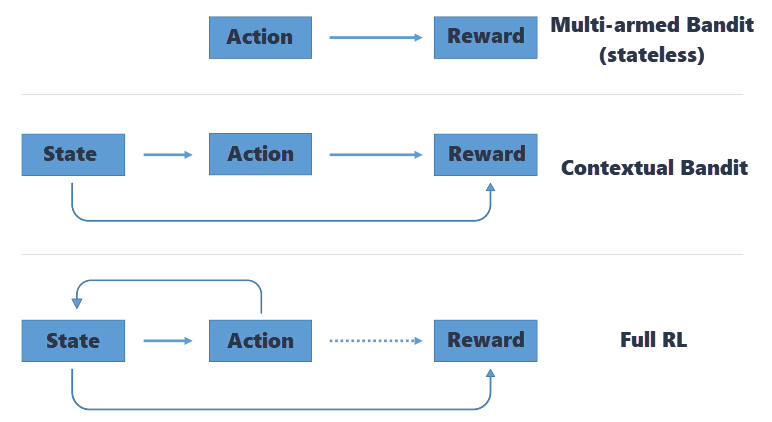